# LR with PCA

In [14]:
import numpy as np
import pandas as pd
features_3s = pd.read_csv("D:\My Files\Documents\College Docs\Major Project\Data/features_3_sec.csv")
features_3s.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
features_3s['label'] = labelencoder.fit_transform(features_3s['label']);

In [16]:
# features_3s.drop(['filename'],axis=1)

In [17]:
X = features_3s.iloc[:,2:-1].values
# X
y = features_3s.iloc[:, 59].values
# y

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
# X_train
X_test = sc.transform(X_test)
# X_test

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_

In [21]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'saga', max_iter=200)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, solver='saga')

In [22]:
y_pred = lr_model.predict(X_test)
y_pred

array([4, 7, 3, ..., 3, 9, 7])

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[147,   1,  29,  18,   8,  27,  23,   0,  15,  19],
       [  1, 257,   4,   0,   0,  27,   0,   0,   2,   4],
       [102,   3,  75,  27,  11,  27,   4,   7,  21,  36],
       [ 20,   5,  13,  82,  35,   2,  37,  41,  16,  39],
       [ 13,   1,   4,  17, 136,   1,  36,  41,  48,   4],
       [ 19,  30,  16,  10,   0, 179,   0,   7,   9,  25],
       [ 21,   1,   0,  18,   8,   1, 240,   0,   4,  19],
       [  0,   3,  17,  14,  11,   6,   0, 217,  17,   2],
       [ 27,   2,  23,  10,  35,   7,   3,  19, 186,   6],
       [ 49,   7,  22,  39,   9,  26,  39,  14,  16,  78]], dtype=int64)

Text(159.0, 0.5, 'Truth/Actual Label')

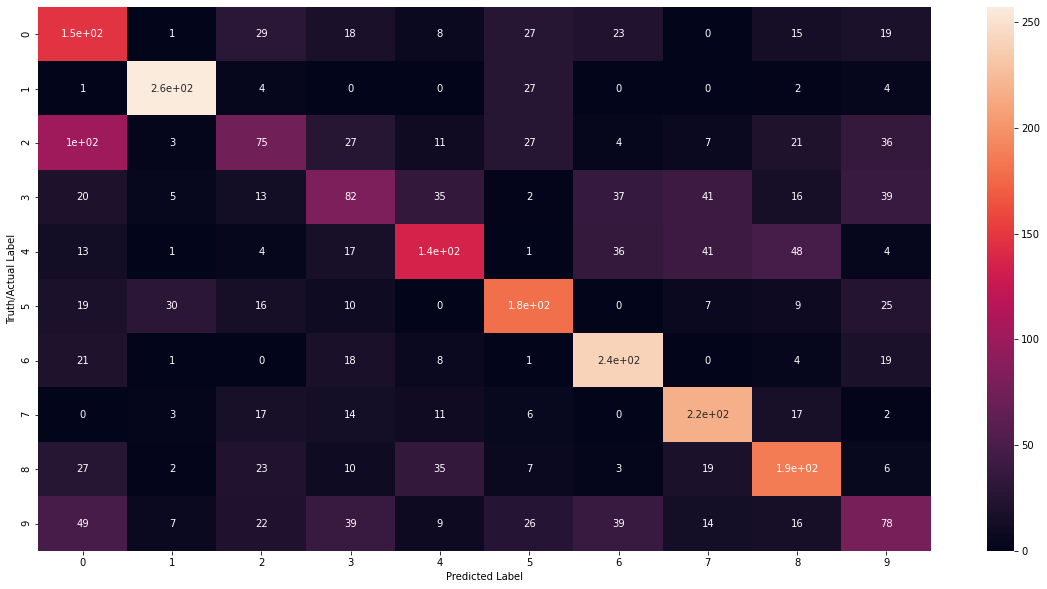

In [24]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (20,10))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("Truth/Actual Label")

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.51      0.43       287
           1       0.83      0.87      0.85       295
           2       0.37      0.24      0.29       313
           3       0.35      0.28      0.31       290
           4       0.54      0.45      0.49       301
           5       0.59      0.61      0.60       295
           6       0.63      0.77      0.69       312
           7       0.63      0.76      0.69       287
           8       0.56      0.58      0.57       318
           9       0.34      0.26      0.29       299

    accuracy                           0.53      2997
   macro avg       0.52      0.53      0.52      2997
weighted avg       0.52      0.53      0.52      2997



In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.5328661995328662

In [27]:
print ('Accuracy for Logistic Regression Classifier :', accuracy_score(y_test,  y_pred))

Accuracy for Logistic Regression Classifier : 0.5328661995328662
